In [37]:
# Task
# 01 Top 05 meilleures auteurs
# 02 regroupe les articles selon le mois pour ces top_5_authors
# 03 extract names of person in each article
# 04 extract person name in Content column and add column Person
# On aimerais savoir les noms des personnes les plus mentionnées par les top 5 auteurs selon le mois et l'année de publication

In [1]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 640.0 kB/s eta 0:00:20
     --------------------------------------- 0.1/12.8 MB 650.2 kB/s eta 0:00:20
     ---------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.4/12.8 MB 2.3 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 4.3 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/12.8 MB 7.2 MB/s eta 0:00:02
     ----------- ---------------------------- 3.5/12.8 MB 10.7 MB/s eta 0:00:01
     ----------------- ---------------------- 5.5/12.8 MB 14.6 MB/s eta 0:00:01
     ----------------------- ---------------- 7.4/12.8 MB 17.6 MB/s eta 0:00:01
     --------------------------- ------------ 8.8/12.8 MB 18.7 MB/s eta 0:00:01
     -------------------------------- ------ 10.7/12.8 MB 31.2 MB/s eta 0:00:01
     --------------------------------------  12.7/12

In [2]:
import pandas as pd
import spacy
from collections import Counter
import spacy
from datetime import datetime
nlp = spacy.load('en_core_web_sm')

In [3]:
def extract_person_names(text):
  doc = nlp(text)
  return [ent.text for ent in doc.ents if ent.label_ == "PERSON"]

def process_articles(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    top_5_authors = df['Author'].value_counts().head(5).index.tolist()
    df_top_5 = df[df['Author'].isin(top_5_authors)]
    df_top_5['Person'] = df_top_5['Content'].apply(extract_person_names)
    df_person = df_top_5.explode('Person')
    grouped = df_top_5.groupby(['Year', 'Month', 'Author'])
    most_mentioned_persons = {}
    for (year, month, author), group in grouped:
        persons = group['Person'].tolist()
        persons = [person for sublist in persons for person in sublist]
        most_mentioned_persons[(year, month, author)] = Counter(persons).most_common(1)
    return most_mentioned_persons

def top_N_persons(df, N):
    return df['Author'].value_counts().head(5).index.tolist()


def group_by_month(df):
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    top_5_authors = top_N_persons(df, 5)
    df_top_5 = df[df['Author'].isin(top_5_authors)]
    grouped = df_top_5.groupby(['Year', 'Month', 'Author'])
    df_person = df_top_5.explode('Person')
    return grouped, df_person

def most_mentioned_persons(df):
    most_mentioned_persons = {}
    for (year, month, author), group in df:
        persons = group['Person'].tolist()
        persons = [person for sublist in persons for person in sublist]
        most_mentioned_persons[(year, month, author)] = Counter(persons).most_common(2)
    return most_mentioned_persons



In [4]:
file_path = './data/news_articles.csv'
most_mentioned_persons = process_articles(file_path)

for key, persons in most_mentioned_persons.items():
    year, month, author = key
    print(f"Year: {year}, Month: {month}, Author: {author}")
    for person, count in persons:
        print(f"  {person}: {count} mentions")

C:\Users\dscon\AppData\Local\Temp\ipykernel_21240\4110653175.py:7: FutureWarning: Parsed string "August 22, 2016 12:34 IST" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Year: 2014.0, Month: 7.0, Author: Mugdha Variyar
  Gupta: 4 mentions
Year: 2014.0, Month: 8.0, Author: Mugdha Variyar
  Bangalore: 5 mentions
Year: 2014.0, Month: 9.0, Author: Mugdha Variyar
  Lodha: 1 mentions
Year: 2014.0, Month: 10.0, Author: Mugdha Variyar
  Pushkar: 7 mentions
Year: 2014.0, Month: 11.0, Author: Mugdha Variyar
  Pushkar: 3 mentions
Year: 2014.0, Month: 12.0, Author: Anu James
  Salman Khan: 3 mentions
Year: 2014.0, Month: 12.0, Author: Mugdha Variyar
  Mubarak: 5 mentions
Year: 2014.0, Month: 12.0, Author: Prakash Upadhyaya
  Bollywood Khans: 1 mentions
Year: 2015.0, Month: 1.0, Author: Anu James
  Mani: 7 mentions
Year: 2015.0, Month: 1.0, Author: Mugdha Variyar
  Charlie Hebdo: 20 mentions
Year: 2015.0, Month: 1.0, Author: Prakash Upadhyaya
  Lingaa: 4 mentions
Year: 2015.0, Month: 1.0, Author: Rohit KVN
  Jonney Shih: 1 mentions
Year: 2015.0, Month: 2.0, Author: Anu James
  Valentine: 7 mentions
Year: 2015.0, Month: 2.0, Author: Mugdha Variyar
  Quilliam: 1 ment

C:\Users\dscon\AppData\Local\Temp\ipykernel_21240\4110653175.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5['Person'] = df_top_5['Content'].apply(extract_person_names)


## **01 Top 05 meilleures auteurs**

In [5]:
import pandas as pd

file_path = './data/news_articles.csv'

df = pd.read_csv(file_path)

def top_N_authors(df, N):
    top_authors = df['Author'].value_counts().head(N).index.tolist()
    print(f"Top {N} Authors: {top_authors}")
    return top_authors
top_5_authors = top_N_authors(df, 5)


Top 5 Authors: ['Rohit KVN', 'Besta Shankar', 'Prakash Upadhyaya', 'Mugdha Variyar', 'Anu James']


In [6]:
sentences = [sentence for content in df['Content'].tolist() for sentence in content.split('.')]
print(f"Number of sentences: {len(sentences)}")
words = [ word for sentence in sentences for word in sentence.split() ]
len(words)/len(sentences)

Number of sentences: 4831


267.9732974539433

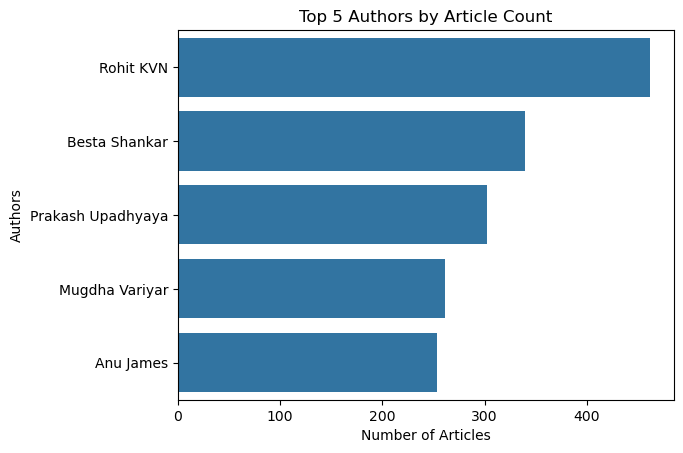

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for top 5 authors
top_authors_counts = df['Author'].value_counts().head(5)
sns.barplot(x=top_authors_counts.values, y=top_authors_counts.index)
plt.title("Top 5 Authors by Article Count")
plt.xlabel("Number of Articles")
plt.ylabel("Authors")
plt.show()


## **02 Regroupement des articles selon le mois pour ces top_5_authors**

In [8]:
def group_by_month(df, top_authors):
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month

    df_top_5 = df[df['Author'].isin(top_authors)]    
    grouped = df_top_5.groupby(['Year', 'Month', 'Author'])
    print("Grouped by Year, Month, and Author:")
    print(df_top_5[['Year', 'Month', 'Author']].head())
    
    return grouped, df_top_5

grouped, df_top_5 = group_by_month(df, top_5_authors)


Grouped by Year, Month, and Author:
      Year  Month             Author
28  2016.0    2.0  Prakash Upadhyaya
30  2016.0    2.0  Prakash Upadhyaya
31  2016.0    2.0  Prakash Upadhyaya
32  2016.0    2.0  Prakash Upadhyaya
35  2016.0    2.0  Prakash Upadhyaya


C:\Users\dscon\AppData\Local\Temp\ipykernel_21240\176959601.py:2: FutureWarning: Parsed string "August 22, 2016 12:34 IST" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


## **03 Extraction of person names in each article**

In [9]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_person_names(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "PERSON"]

df_top_5['Person'] = df_top_5['Content'].apply(extract_person_names)

print("Extracted Person Names in the First Article:")
print(df_top_5[['Content', 'Person']].head())


Extracted Person Names in the First Article:
                                              Content  \
28  Actress Pranitha Subhash met with an accident ...   
30  Siddharth Narayanan-starrer  Jil Jung Juk   al...   
31  After his last film  Yatchan  bombed at the bo...   
32  The teaser of Vijay starrer  Theri  has taken ...   
35  Siddharth starrer  Jil Jung Juk   also spelled...   

                                               Person  
28  [Pranitha Subhash, Mothey, Pranitha, Pranitha,...  
30  [Siddharth Narayanan-starrer, Jil Jung Juk   ,...  
31  [Vishnuvardhan, Balakumaran, Vishnuvardhan, Aj...  
32  [Atlee Kumar, Samantha, Amy Jackson, Tamil, Ka...  
35  [Jil Jung Juk   , Jil Jung Juck   , Vil Ambu R...  


C:\Users\dscon\AppData\Local\Temp\ipykernel_21240\435647235.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5['Person'] = df_top_5['Content'].apply(extract_person_names)


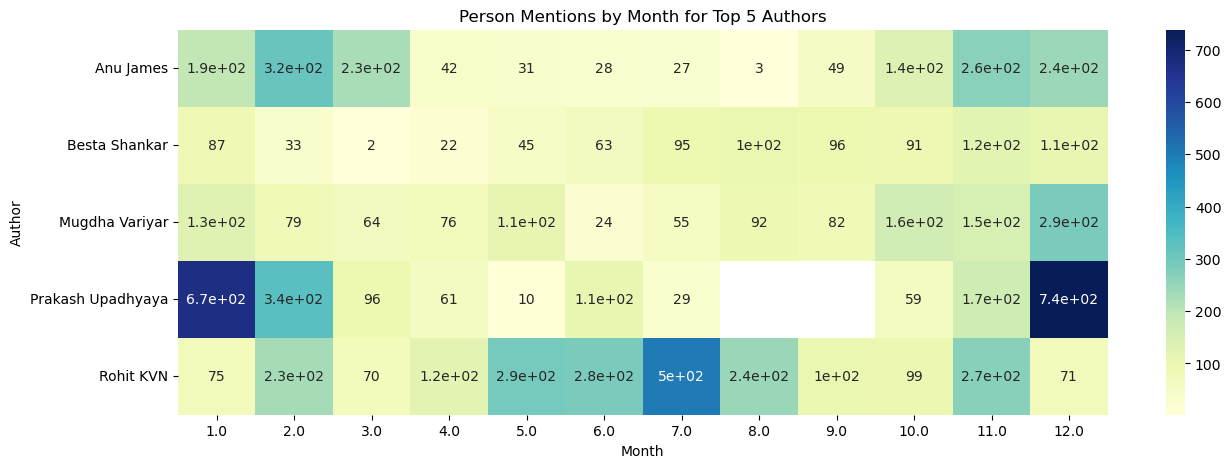

In [10]:
df_person = df_top_5.explode('Person')
mention_data = df_person.pivot_table(index='Author', columns='Month', values='Person', aggfunc='count')

# size of the plot
plt.figure(figsize=(15, 5))
sns.heatmap(mention_data, annot=True, cmap='YlGnBu')
plt.title("Person Mentions by Month for Top 5 Authors")
plt.show()


## **04 Extraction of person name in Content column and add column Person**

In [11]:
# The 'Person' column was already added in the previous cell
print("DataFrame with Person Column Added:")
print(df_top_5[['Author', 'Content', 'Person']].head())

DataFrame with Person Column Added:
               Author                                            Content  \
28  Prakash Upadhyaya  Actress Pranitha Subhash met with an accident ...   
30  Prakash Upadhyaya  Siddharth Narayanan-starrer  Jil Jung Juk   al...   
31  Prakash Upadhyaya  After his last film  Yatchan  bombed at the bo...   
32  Prakash Upadhyaya  The teaser of Vijay starrer  Theri  has taken ...   
35  Prakash Upadhyaya  Siddharth starrer  Jil Jung Juk   also spelled...   

                                               Person  
28  [Pranitha Subhash, Mothey, Pranitha, Pranitha,...  
30  [Siddharth Narayanan-starrer, Jil Jung Juk   ,...  
31  [Vishnuvardhan, Balakumaran, Vishnuvardhan, Aj...  
32  [Atlee Kumar, Samantha, Amy Jackson, Tamil, Ka...  
35  [Jil Jung Juk   , Jil Jung Juck   , Vil Ambu R...  


## **Top 5 most mentioned persons**

In [12]:
from collections import Counter

def most_mentioned_persons(grouped):
    most_mentioned = {}
    
    for (year, month, author), group in grouped:
        group = group.explode('Person')
        persons = group['Person'].dropna().tolist()
        
        person_counts = Counter(persons).most_common(5) 
        most_mentioned[(year, month, author)] = person_counts
    
    for key, persons in most_mentioned.items():
        year, month, author = key
        print(f"Year: {year}, Month: {month}, Author: {author}")
        for person, count in persons:
            print(f"  {person}: {count} mentions")
    
    return most_mentioned

most_mentioned = most_mentioned_persons(grouped)


Year: 2014.0, Month: 7.0, Author: Mugdha Variyar
  Gupta: 4 mentions
  Bangalore: 4 mentions
  Pushkar: 3 mentions
  Sudhir Gupta: 2 mentions
  Mustafa: 2 mentions
Year: 2014.0, Month: 8.0, Author: Mugdha Variyar
  Bangalore: 5 mentions
  Arif: 3 mentions
  Ananthamurthy: 2 mentions
  Tamil Nadu: 2 mentions
  Tanki: 2 mentions
Year: 2014.0, Month: 9.0, Author: Mugdha Variyar
  Lodha: 1 mentions
  Kurian Joseph: 1 mentions
  York: 1 mentions
  Mufid A  Elfgeeh: 1 mentions
  Arif Majeed: 1 mentions
Year: 2014.0, Month: 10.0, Author: Mugdha Variyar
  Pushkar: 7 mentions
  Bangalore: 3 mentions
  Modi: 3 mentions
  Nawaz Sharif: 3 mentions
  Omar Abdullah: 2 mentions
Year: 2014.0, Month: 11.0, Author: Mugdha Variyar
  Pushkar: 3 mentions
  Mubarak: 3 mentions
  Sunanda Pushkar s: 1 mentions
  Speculations: 1 mentions
  Hosni Mubarak: 1 mentions
Year: 2014.0, Month: 12.0, Author: Anu James
  Salman Khan: 3 mentions
  Maria Sharapova: 3 mentions
  Bigg Boss: 2 mentions
  Rahul Gandhi: 2 ment

C:\Users\dscon\AppData\Local\Temp\ipykernel_21240\1012195024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5['Person'] = df_top_5['Person'].dropna().astype(str)


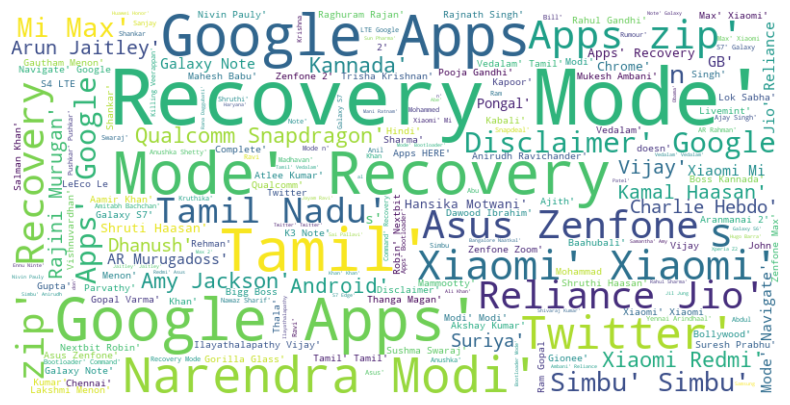

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_top_5['Person'] = df_top_5['Person'].dropna().astype(str)

all_persons = ' '.join(df_top_5['Person'].explode())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_persons)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [14]:
# !pip install wordcloud

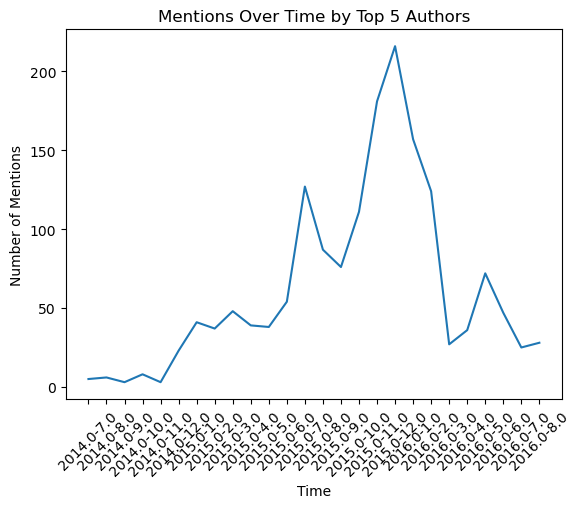

In [15]:
# 4. Time-Series Line Plot for Mentions Over Time
# Line plot for number of mentions over time
mention_time = df_top_5.groupby(['Year', 'Month']).size().reset_index(name='Mention Count')

plt.plot(mention_time['Year'].astype(str) + '-' + mention_time['Month'].astype(str), mention_time['Mention Count'])
plt.title("Mentions Over Time by Top 5 Authors")
plt.xlabel("Time")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


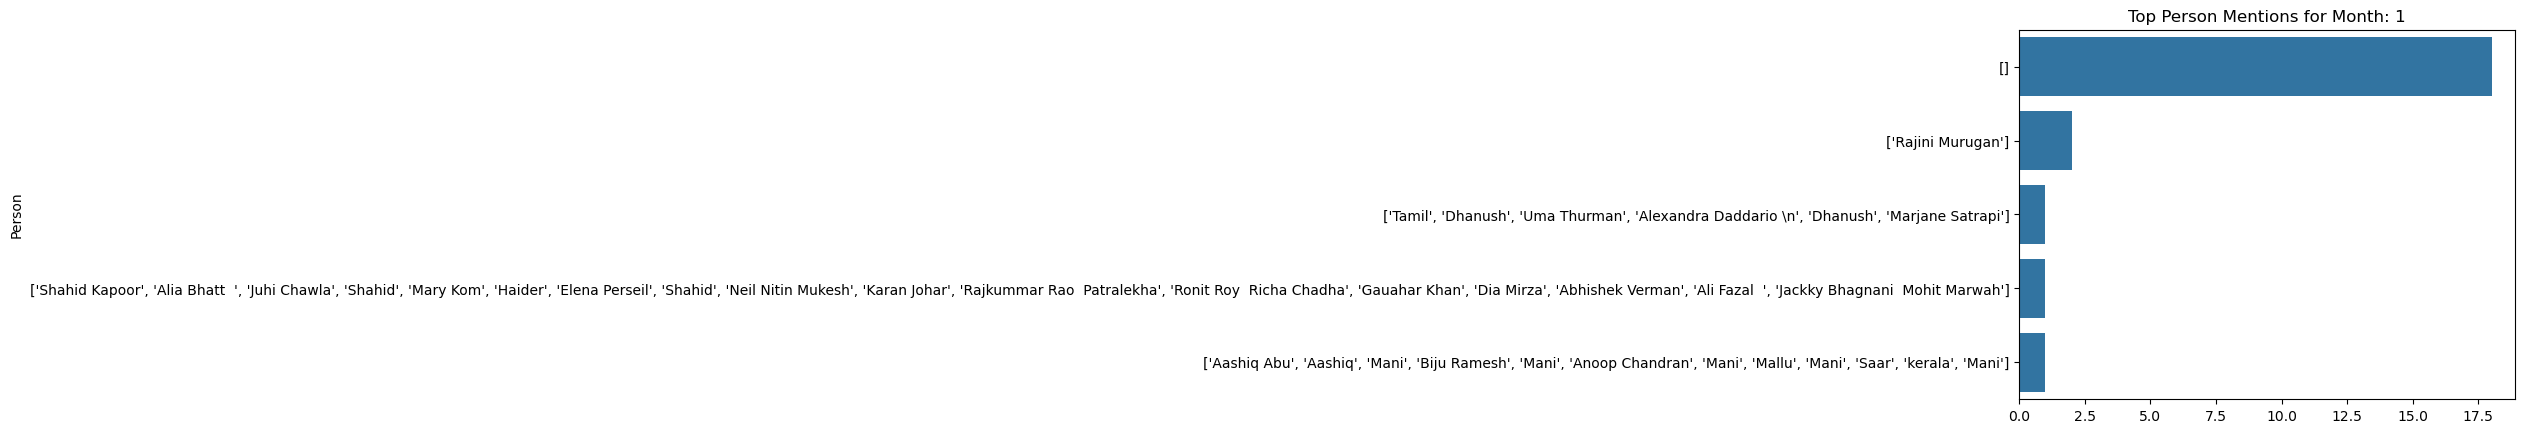

In [16]:
import matplotlib.animation as animation

fig, ax = plt.subplots()
def update(month):
    data = df_top_5[df_top_5['Month'] == month].explode('Person')
    ax.clear()
    sns.barplot(x=data['Person'].value_counts().head(5).values, y=data['Person'].value_counts().head(5).index, ax=ax)
    ax.set_title(f"Top Person Mentions for Month: {month}")

ani = animation.FuncAnimation(fig, update, frames=range(1, 13), repeat=False)
ani.save("person_mentions.gif", writer="imagemagick")


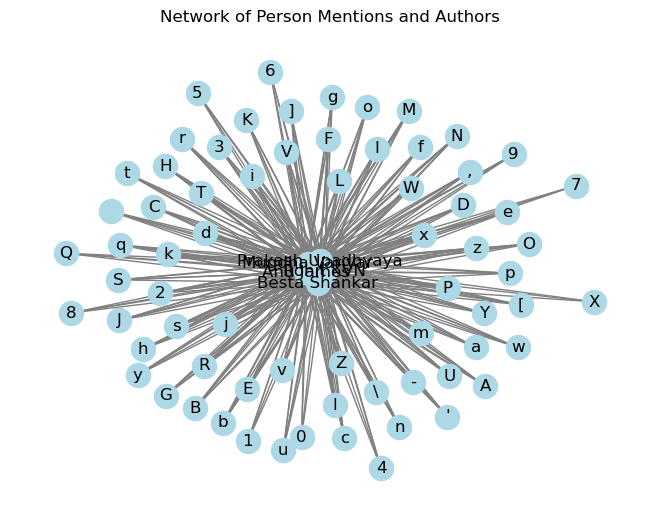

In [17]:
import networkx as nx

G = nx.Graph()

# Add nodes and edges for authors and persons
for _, row in df_top_5.iterrows():
    author = row['Author']
    persons = row['Person']
    for person in persons:
        G.add_edge(author, person)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Network of Person Mentions and Authors")
plt.show()


C:\Users\dscon\AppData\Local\Temp\ipykernel_21240\3274815616.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(top_5_authors))  # Color map for authors


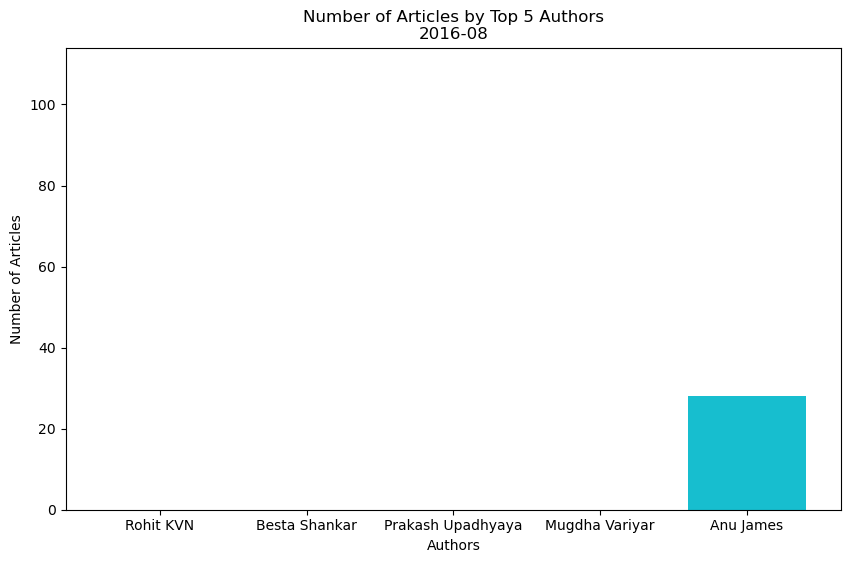

In [18]:
from matplotlib.animation import FuncAnimation
from matplotlib import rcParams



grouped_df = grouped.size().reset_index(name='ArticleCount')
pivot_df = grouped_df.pivot_table(index=['Year', 'Month'], columns='Author', values='ArticleCount', fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', len(top_5_authors))  # Color map for authors

def update(month_idx):
    ax.clear()
    year, month = pivot_df.index[month_idx]
    counts = pivot_df.iloc[month_idx]
    
    ax.bar(top_5_authors, counts, color=colors(range(len(top_5_authors))))
    ax.set_title(f"Number of Articles by Top 5 Authors\n{int(year)}-{int(month):02d}")
    ax.set_xlabel("Authors")
    ax.set_ylabel("Number of Articles")
    ax.set_ylim(0, pivot_df.max().max() + 5)  
anim = FuncAnimation(fig, update, frames=len(pivot_df), interval=500)
anim.save('top_authors_articles.gif', writer='pillow', fps=2) 
plt.show()


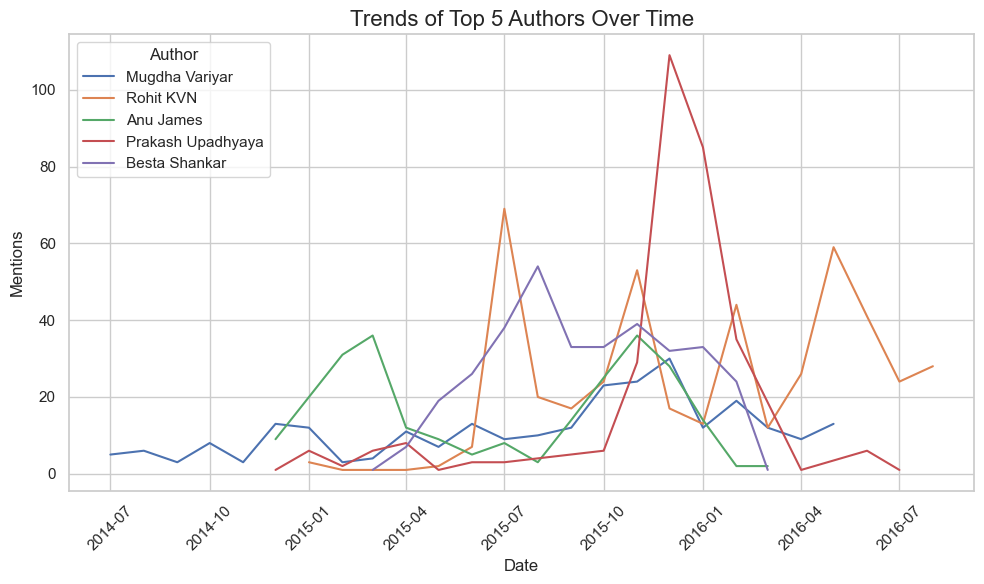

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df_grouped = df_top_5.groupby(['Year', 'Month', 'Author'])['Person'].apply(lambda x: len(x)).reset_index(name='Mentions')

# Setting up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting trends for the top 5 authors
top_5_authors = df_grouped['Author'].value_counts().index[:5]
df_top_authors = df_grouped[df_grouped['Author'].isin(top_5_authors)]

# Plot line graph
for author in top_5_authors:
    author_data = df_top_authors[df_top_authors['Author'] == author]
    plt.plot(
        pd.to_datetime(author_data[['Year', 'Month']].assign(Day=1)),
        author_data['Mentions'],
        label=author
    )

# Customizing the plot
plt.title('Trends of Top 5 Authors Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mentions', fontsize=12)
plt.legend(title='Author', loc='upper left')

# Display plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
df_top_5

,Article_Id,Title,Author,Date,Content,URL,Year,Month,Person
28,28,Multilingual actress Pranitha escapes road acc...,Prakash Upadhyaya,2016-02-15 12:44:00,Actress Pranitha Subhash met with an accident ...,NaN,2016.0,2.0,"['Pranitha Subhash', 'Mothey', 'Pranitha', 'Pr..."
30,30,Box office collection Jil Jung Juk Deadpo...,Prakash Upadhyaya,2016-02-15 11:42:00,Siddharth Narayanan-starrer Jil Jung Juk al...,http://www.ibtimes.co.in/box-office-collection...,2016.0,2.0,"['Siddharth Narayanan-starrer', 'Jil Jung Juk ..."
31,31,Ajith set to take up Vishnuvardhan s historica...,Prakash Upadhyaya,2016-02-15 10:38:00,After his last film Yatchan bombed at the bo...,http://www.ibtimes.co.in/ajith-set-take-vishnu...,2016.0,2.0,"['Vishnuvardhan', 'Balakumaran', 'Vishnuvardha..."
32,32,Theri teaser Will Vijay starrer clip reach ...,Prakash Upadhyaya,2016-02-14 14:42:00,The teaser of Vijay starrer Theri has taken ...,http://www.ibtimes.co.in/theri-teaser-will-vij...,2016.0,2.0,"['Atlee Kumar', 'Samantha', 'Amy Jackson', 'Ta..."
35,35,Jil Jung Juk movie review Live audience res...,Prakash Upadhyaya,2016-02-12 15:36:00,Siddharth starrer Jil Jung Juk also spelled...,http://www.ibtimes.co.in/jil-jung-juk-movie-re...,2016.0,2.0,"['Jil Jung Juk ', 'Jil Jung Juck ', 'Vil A..."
...,...,...,...,...,...,...,...,...,...
4808,4808,Sensex May Fall by Over 2 000 Points in Next 3...,Besta Shankar,2015-06-27 15:06:00,Although the domestic stock markets have witne...,http://www.ibtimes.co.in/sensex-may-fall-by-ov...,2015.0,6.0,"['Saurabh Mukherjea', 'Mukherjea', 'Mukherjea ..."
4809,4809,Gold Prices May See Free Fall on US Fed Rate Hike,Besta Shankar,2015-07-30 13:59:00,Things seem to be getting worse for precious m...,http://www.ibtimes.co.in/gold-prices-may-see-f...,2015.0,7.0,"['Robin Bhar', 'Bloomberg']"
4810,4810,Gold Prices May Plunge to Rs 23 000 in a Month,Besta Shankar,2015-07-27 12:25:00,Gold prices are estimated to decline further t...,NaN,2015.0,7.0,['Gnanasekar Thiagarajan']
4811,4811,Rajesh Exports Buys 100 Stake in World s Larg...,Besta Shankar,2015-07-27 13:26:00,Domestic jewellery maker Rajesh Exports Ltd R...,NaN,2015.0,7.0,['Valcambi']


**Lab 2 (Next)**

1. À partir de la liste des news (après l’étape de preprocessing), créer le vocabulaire des mots.
2. À partir de chaque texte de news, récupérer aléatoirement et uniformément 10 couples de mots consécutifs. Cette liste sera le contexte que vous utiliserez pour le Word2Vec.
3. Word to vec:
    1. Initialiser les vecteurs aléatoirement.
    2. Calculer le Loss comme étant la somme des p.log(p), ou p est:
        1.
        
        ![image.png](https://prod-files-secure.s3.us-west-2.amazonaws.com/497a6527-140e-4ab4-9f0b-744af5b746e1/9c355e1a-c98b-4b58-9df4-94ea09f4a0a9/image.png)
        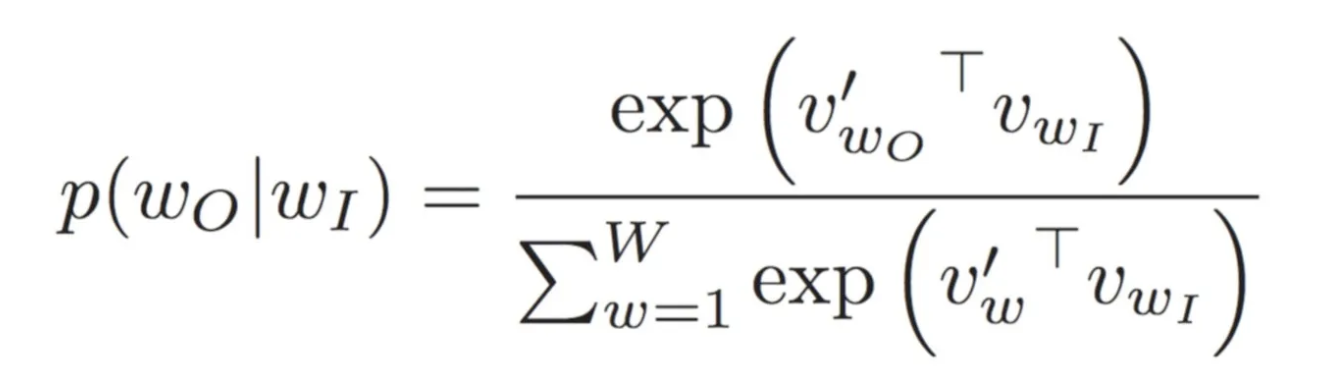
        
    3. Mettre a jour les vecteurs  en utilisant la méthode de back-propagation  (il faut calculer la derive du loss par rapport au vecteur qu’on mets a jour.
    4. refaire la boucle jusqu’a a ce que le loss converge (disnat ne change que par < 1% pendant 5 iteration consécutives)
4. Calculer le vecteur d’un text en faisant la moyenne des vecteur qu’il contient.
5. Transposer les vecteur dans un espace 2-d en utilisant la méthode que vous avez inventer pendant le cours :)
6. Utiliser matplot lib pour afficher chaque chaque article dans un espace 2d, le couleur du point doit indiquer l’auteur de l’article


In [21]:
df

,Article_Id,Title,Author,Date,Content,URL,Year,Month
0,0,14 dead after bus falls into canal in Telangan...,Devyani Sultania,2016-08-22 12:34:00,At least 14 people died and 17 others were inj...,http://www.ibtimes.co.in/14-dead-after-bus-fal...,2016.0,8.0
1,1,Pratibha Tiwari molested on busy road Saath ...,Suparno Sarkar,2016-08-22 19:47:00,TV actress Pratibha Tiwari who is best known ...,NaN,2016.0,8.0
2,2,US South Korea begin joint military drill ami...,Namrata Tripathi,2016-08-22 18:10:00,The United States and South Korea began a join...,http://www.ibtimes.co.in/us-south-korea-begin-...,2016.0,8.0
3,3,Illegal construction in Bengaluru Will my hou...,S V Krishnamachari,2016-08-22 17:39:00,The relentless drive by Bengaluru s Bangalore...,http://www.ibtimes.co.in/illegal-construction-...,2016.0,8.0
4,4,Punjab Gau Rakshak Dal chief held for assaulti...,Pranshu Rathee,2016-08-22 17:34:00,Punjab Gau Raksha Dal chief Satish Kumar and h...,http://www.ibtimes.co.in/punjab-gau-rakshak-da...,2016.0,8.0
...,...,...,...,...,...,...,...,...
4826,4826,Samsung Galaxy S6 vs Apple iPhone 6 Top Samsu...,Sami Khan,2015-03-16 17:03:00,Apple won its share of fame when it launched i...,http://www.ibtimes.co.in/samsung-galaxy-s6-vs-...,2015.0,3.0
4827,4827,HTC Latest Octa Core Smartphone One E9 Spotted...,Anirban Roy,2015-03-11 15:50:00,HTC launched One M9 at MWC 2015 few days back...,http://www.ibtimes.co.in/htc-latest-octa-core-...,2015.0,3.0
4828,4828,Samsung Galaxy S6 Active Water Resistant Vari...,Sami Khan,2015-03-10 14:47:00,Samsung s critically-acclaimed Galaxy S6 and G...,http://www.ibtimes.co.in/samsung-galaxy-s6-act...,2015.0,3.0
4829,4829,Google Rolls Out Android 5 1 Lollipop OTA Imp...,Anirban Roy,2015-03-10 14:20:00,Google has finally released the Android 5 1 Lo...,http://www.ibtimes.co.in/google-rolls-out-andr...,2015.0,3.0


In [22]:
all_contents = df['Content'].str.cat(sep=' ')
all_contents = all_contents.lower()
all_contents = [word for word in all_contents.split() if word.isalpha()]
all_contents = [word for word in all_contents if len(word) > 1]
all_contents = [word for word in all_contents if word not in nlp.Defaults.stop_words]

nlp.max_length = len(' '.join(all_contents)) + 1000

all_contents = [token.lemma_ for token in nlp(' '.join(all_contents))]
all_contents = ' '.join(all_contents).split()



In [23]:
vocab = Counter(all_contents)

**Étape 2 : Récupérer aléatoirement 10 couples de mots consécutifs**

In [25]:
import numpy as np

def get_random_N_pairs_of_words(vocab, N):
    words = list(vocab.keys())
    pairs = np.random.choice(words, (N, 2))
    return pairs

**Étape 3 : Implémenter Word2Vec**

Word Vectors Shape: (29414, 50)


$
p(w_O | w_I) = \frac{\exp \left( \mathbf{v}'_{w_O}^\top \mathbf{v}_{w_I} \right)}{\sum_{w=1}^{W} \exp \left( \mathbf{v}'_{w}^\top \mathbf{v}_{w_I} \right)}
$

In [96]:
def initialize_vectors(vocab_size, vector_size):
    return np.random.rand(vocab_size, vector_size) - 0.5


def compute_probability(w_I, w_O, words_vectors, output_vectors, word_to_index):
    w_I_index = word_to_index[w_I]
    w_O_index = word_to_index[w_O]
    
    v_WI = words_vectors[w_I_index]
    v_WO = output_vectors[w_O_index]
    
    prod = np.dot(v_WI, v_WO)
    
    # Stabiliser les calculs en soustrayant le maximum
    dot_products = np.dot(output_vectors, v_WO)
    max_dot_product = max(dot_products)
    
    exp_product = np.exp(prod - max_dot_product)
    softmax_denom = np.sum(np.exp( dot_products - max_dot_product))
    if softmax_denom == 0:  # Prévenir division par zéro
        return 1e-10  # Valeur proche de zéro
    
    probability = exp_product / softmax_denom
    return np.clip(probability, 1e-10, 1.0)

def compute_loss(context_pairs, words_vectors, output_vectors, word_to_index):
    loss = 0
    for w_O, w_I in context_pairs:
        prob = compute_probability(w_I, w_O, words_vectors, output_vectors, word_to_index)
        loss -= np.log(prob)
    return loss
    

**Etape 04 avec la methode de back propagation**

In [103]:
def compute_gradient(w_I, w_O, words_vectors, output_vectors, prob, word_to_index):
    w_I_idx = word_to_index[w_I]
    w_O_idx = word_to_index[w_O]

    v_WI = words_vectors[w_I_idx]
    v_WO = output_vectors[w_O_idx]
    grad_loss_WI = (prob - 1) * v_WO
    grad_loss_WO = (prob - 1) * v_WI
    
    return grad_loss_WI, grad_loss_WO

def backprop_update(w_I, w_O, words_vectors, output_vectors, learning_rate, word_to_index):
    prob = compute_probability(w_I, w_O, words_vectors, output_vectors, word_to_index)
    grad_loss_WI, grad_loss_WO = compute_gradient(w_I, w_O, words_vectors, output_vectors, prob, word_to_index)
    
    w_I_idx = word_to_index[w_I]
    w_O_idx = word_to_index[w_O]
    words_vectors[w_I_idx] -= learning_rate * grad_loss_WI
    output_vectors[w_O_idx] -= learning_rate * grad_loss_WO
    
    return prob

def train_word2vec(context_pairs, words_vectors, output_vectors, word_to_index, learning_rate=0.1, max_iterations=1000, tolerance=0.0001, patience=5):
    previous_loss = float('inf')
    best_loss = float('inf')  # Pour suivre le meilleur loss
    patience_counter = 0

    best_words_vectors = words_vectors.copy()
    best_output_vectors = output_vectors.copy()

    for iteration in range(max_iterations):
        total_loss = 0

        for w_O, w_I in context_pairs:
            prob = backprop_update(w_I, w_O, words_vectors, output_vectors, learning_rate, word_to_index)

            total_loss -= np.log(prob) 
        loss_change = abs((previous_loss - total_loss) / previous_loss) if previous_loss != 0 else float('inf')
        print(f"Iteration {iteration}: Loss = {total_loss:.4f}, Change = {loss_change:.4%}, lr = {learning_rate:.6f}")

        if total_loss < best_loss:
            best_loss = total_loss
            best_words_vectors = words_vectors.copy()
            best_output_vectors = output_vectors.copy()
            patience_counter = 0  
        else:
            patience_counter += 1  

        if patience_counter >= patience:
            print(f"Arrêt de l'entraînement car aucune amélioration observée pendant {patience} itérations.")
            break

        # Ajuster le learning rate si le loss a augmenté
        if total_loss > previous_loss:
            print(f"Ajustement du learning rate de {learning_rate:.6f} à {learning_rate * 0.5:.6f} car le loss a augmenté.")
            learning_rate *= 0.5

        previous_loss = total_loss

        # Condition d'arrêt
        if loss_change < tolerance:
            print("Convergence atteinte.")
            break

    # Renvoyer les meilleurs vecteurs trouvés au cours de l'entraînement
    return best_words_vectors, best_output_vectors


In [104]:
def normalize_vectors(vectors):
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    return vectors / norms

In [105]:
vector_size = 50
vocab_size = len(vocab)
word_vectors = initialize_vectors(vocab_size, vector_size)
print(f"Word Vectors Shape: {word_vectors.shape}")

output_vectors = initialize_vectors(vocab_size, vector_size)

# # Normaliser après l'initialisation
# word_vectors = normalize_vectors(word_vectors)
# output_vectors = normalize_vectors(output_vectors)

context_pairs = get_random_N_pairs_of_words(vocab, 1000)
word_to_index = {word: idx for idx, word in enumerate(vocab)}
loss = compute_loss(context_pairs, word_vectors, output_vectors, word_to_index)
print(f"Initial Loss: {loss}")
trained_word_vectors, trained_output_vectors = train_word2vec(context_pairs, word_vectors, output_vectors, word_to_index)


Word Vectors Shape: (29414, 50)
Initial Loss: 10456.944763057683


C:\Users\dscon\AppData\Local\Temp\ipykernel_21240\42465302.py:43: RuntimeWarning: invalid value encountered in scalar divide
  loss_change = abs((previous_loss - total_loss) / previous_loss) if previous_loss != 0 else float('inf')


Iteration 0: Loss = 10457.2710, Change = nan%, lr = 0.100000
Iteration 1: Loss = 9627.9158, Change = 7.9309%, lr = 0.100000
Iteration 2: Loss = 8786.9304, Change = 8.7349%, lr = 0.100000
Iteration 3: Loss = 7899.0297, Change = 10.1048%, lr = 0.100000
Iteration 4: Loss = 6929.4437, Change = 12.2747%, lr = 0.100000
Iteration 5: Loss = 5851.0622, Change = 15.5623%, lr = 0.100000
Iteration 6: Loss = 4673.0696, Change = 20.1330%, lr = 0.100000
Iteration 7: Loss = 3456.9339, Change = 26.0243%, lr = 0.100000
Iteration 8: Loss = 2353.0636, Change = 31.9321%, lr = 0.100000
Iteration 9: Loss = 1594.7587, Change = 32.2263%, lr = 0.100000
Iteration 10: Loss = 1260.2908, Change = 20.9729%, lr = 0.100000
Iteration 11: Loss = 1221.8744, Change = 3.0482%, lr = 0.100000
Iteration 12: Loss = 1342.6389, Change = 9.8835%, lr = 0.100000
Ajustement du learning rate de 0.100000 à 0.050000 car le loss a augmenté.
Iteration 13: Loss = 1454.3684, Change = 8.3216%, lr = 0.050000
Ajustement du learning rate de 0.

In [106]:
def findNumber(arr, k):
    # k type int
    assert isinstance(k, int), " k must be an integer"
    assert isinstance(arr, list), "arr must be a list"
    return "YES" if k in arr else "NO"

arr = [1, 2, 3, 4, 5]
k = 3
print(findNumber(arr, k))

YES


In [108]:
def oddNumbers(l, r):
    # Write your code here
    assert (l >=1 and l <= r) and (r >= l and r <= 1e5)
    return [number for number in range(l, r+1) if number % 2 ==1]
    
l = 2
r = 5

print(oddNumbers(l, r))

[3, 5]
